In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
import os

In [5]:

#Hyperparameters
input_size = 28*28
num_classes = 10
num_epochs = 5
batch_size =100
learning_rate = 1e-3

#Images and label
train_dataset = torchvision.datasets.MNIST(root='data', 
                                          train=True,
                                          transform=transforms.ToTensor(),
                                          download=True)
test_dataset = torchvision.datasets.MNIST(root='data',
                                         train=False,
                                         transform=transforms.ToTensor())

# Dataloader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

100.1%

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz


113.5%

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz


100.4%

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz


180.4%

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


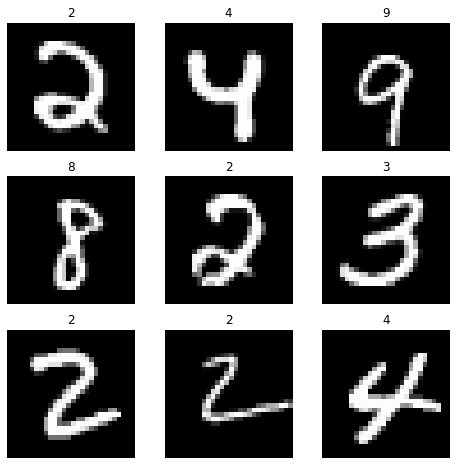

In [7]:
labels_map = {0:"0", 1:"1", 2:"2", 3:"3", 4:"4", 5:"5", 6:"6", 7:"7", 8:"8", 9:"9"}

fig = plt.figure(figsize=(8,8))
cols, rows = 3, 3
for i in range(1, cols*rows + 1):
    sample_idx = torch.randint(len(train_dataset), size=(1,)).item()
    img, label = train_dataset[sample_idx]
    fig.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis('off')
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [9]:
# Build model
# Logistic regression model
model = nn.Linear(input_size, num_classes)
#Loss and Opimizer
# nn.CrossEntropyLoss() computes softmax internally
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

#train_loss = []
epochs_train = []
# Train 
total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Reshape images to (batch_size, input_size)
        images = images.reshape(-1, input_size)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print("Epoch: [{}/{}]\tStep: [{}/{}]\tLoss: {}"
                  .format((epoch+1), num_epochs, i+1, total_steps, loss.item()))
            train_loss.append(loss.item())
print('Done!')

# Test
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, input_size)
        outputs = model(images)
        
        _, predicted = torch.max(outputs.data, 1) #return max_elements and max_indiced
        total += labels.size(0)
        correct += (predicted == labels).sum()
    print('Accuracy of the model on test images: {} %'.format(100 * correct / total))
torch.save(model.state_dict(), 'mnist.pth')

Epoch: [1/5]	Step: [100/600]	Loss: 2.2160863876342773
Epoch: [1/5]	Step: [200/600]	Loss: 2.1372275352478027
Epoch: [1/5]	Step: [300/600]	Loss: 2.041733503341675
Epoch: [1/5]	Step: [400/600]	Loss: 1.9859678745269775
Epoch: [1/5]	Step: [500/600]	Loss: 1.873059868812561
Epoch: [1/5]	Step: [600/600]	Loss: 1.848569393157959
Epoch: [2/5]	Step: [100/600]	Loss: 1.7797977924346924
Epoch: [2/5]	Step: [200/600]	Loss: 1.6340945959091187
Epoch: [2/5]	Step: [300/600]	Loss: 1.578627109527588
Epoch: [2/5]	Step: [400/600]	Loss: 1.509825587272644
Epoch: [2/5]	Step: [500/600]	Loss: 1.4345612525939941
Epoch: [2/5]	Step: [600/600]	Loss: 1.3854010105133057
Epoch: [3/5]	Step: [100/600]	Loss: 1.51389741897583
Epoch: [3/5]	Step: [200/600]	Loss: 1.3814715147018433
Epoch: [3/5]	Step: [300/600]	Loss: 1.3649846315383911
Epoch: [3/5]	Step: [400/600]	Loss: 1.291922926902771
Epoch: [3/5]	Step: [500/600]	Loss: 1.2220993041992188
Epoch: [3/5]	Step: [600/600]	Loss: 1.326693058013916
Epoch: [4/5]	Step: [100/600]	Loss: 1.

In [14]:
train_loss[0:30:6]

[2.2160863876342773,
 1.7797977924346924,
 1.51389741897583,
 1.2145193815231323,
 1.0109989643096924]

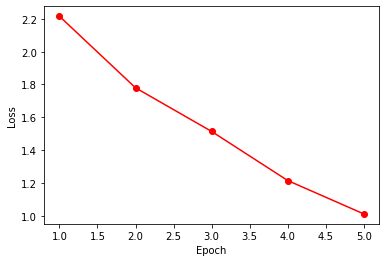

In [17]:
train_epochs = [j for j in range(1,6)]
plt.plot(train_epochs, train_loss[0:30:6], 'ro-')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()